In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# Drop unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
# Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

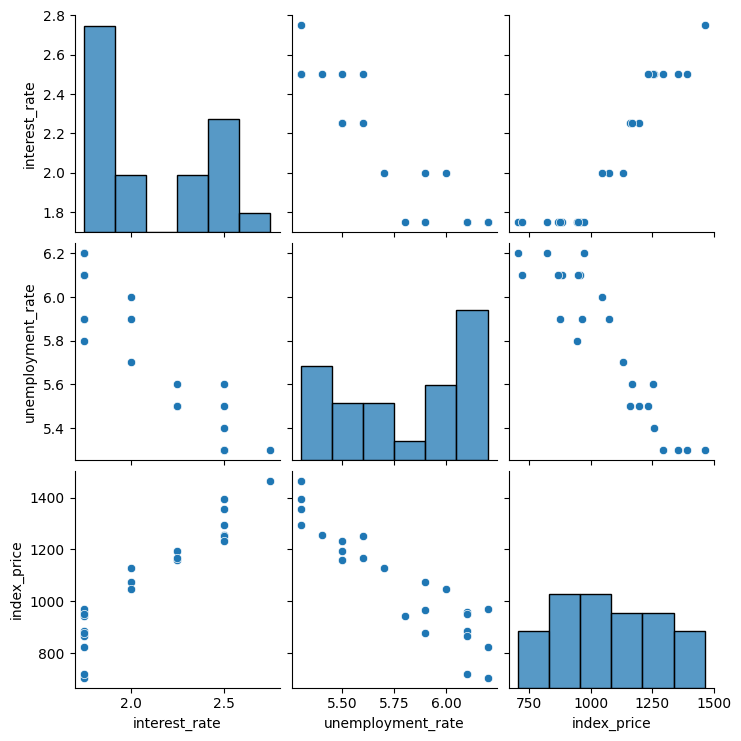

In [6]:
# Let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement rate')

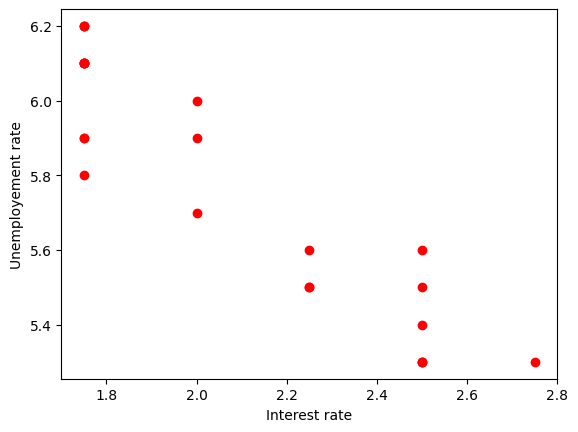

In [8]:
# Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployement rate")

In [9]:
# Independent and dependent features
X = df_index.iloc[:,:-1] # removes last column
y = df_index.iloc[:, -1] # only takes last column

In [10]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42)

In [13]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

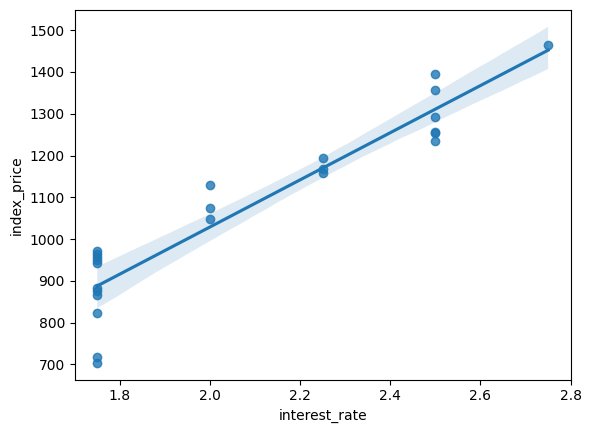

In [19]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

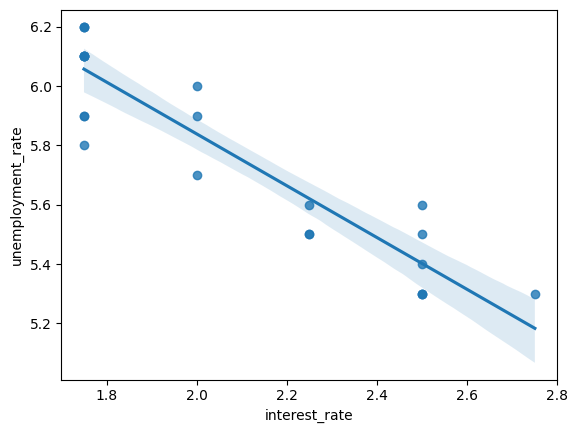

In [22]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

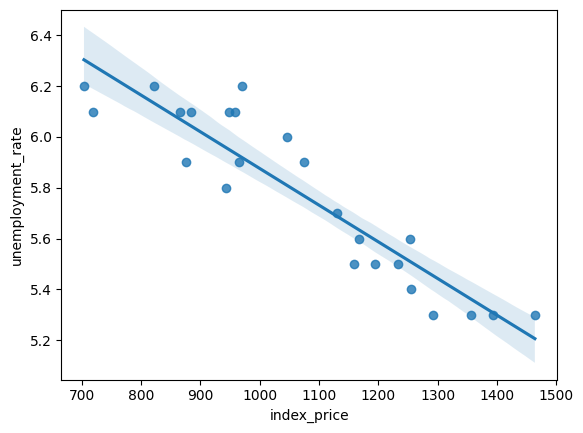

In [24]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [25]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[ 1.29354835, -0.55762672],
       [ 1.29354835, -1.5227499 ],
       [-0.19900744,  0.72920418],
       [-0.94528533,  1.0509119 ],
       [ 1.29354835, -1.5227499 ],
       [ 1.29354835, -1.20104217],
       [-0.94528533,  1.37261963],
       [-0.94528533,  1.0509119 ],
       [-0.94528533,  0.40749645],
       [-0.94528533,  1.0509119 ],
       [ 0.54727045, -0.87933445],
       [-0.19900744, -0.235919  ],
       [-0.94528533,  0.08578873],
       [-0.94528533,  1.0509119 ],
       [ 1.29354835, -0.87933445]])

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',
                                   cv=3)

In [34]:
np.mean(validation_score)

np.float64(-9997.533886220932)

In [35]:
# Prediction
y_pred = regression.predict(X_test)
y_pred

array([1177.93004452,  838.79490369, 1372.85896265,  867.63614823,
        993.94185183, 1149.08879998,  925.31863731, 1304.23574812,
        838.79490369])

In [36]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4801.837014686278
Root Mean Squared Error: 69.29528854609293
Mean Absolute Error: 55.98332182281388


In [38]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print("R^2 Score:", score)

R^2 Score: 0.8881365413737639


In [39]:
# Display adjusted R-squared
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.8508487218316851


## Assumptions

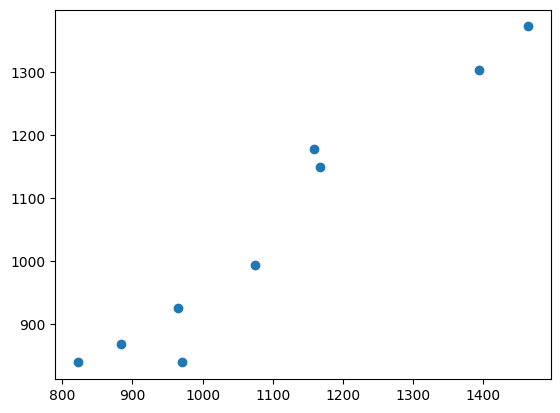

In [40]:
plt.scatter(y_test, y_pred)

In [42]:
residuals = y_test - y_pred
print(residuals)

8     -18.930045
16    132.205096
0      91.141037
18     16.363852
11     81.058148
9      17.911200
13     39.681363
1      89.764252
21    -16.794904
Name: index_price, dtype: float64


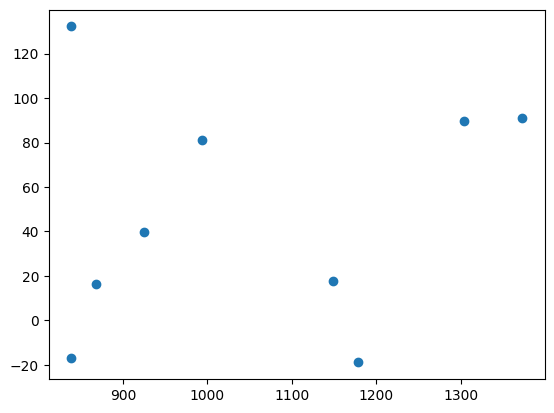

In [43]:
# Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [44]:
# OLS Linear Regression
import statsmodels.api as sm

In [45]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):             -0.117
Method:                 Least Squares   F-statistic:                             0.2143
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                       0.810
Time:                        15:40:03   Log-Likelihood:                         -125.69
No. Observations:                  15   AIC:                                      255.4
Df Residuals:                      13   BIC:                                      256.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
print(regression.coef_)

[ 97.04788068 -98.77187317]
